# Datastax Astra DB

NOTE:
create this project is seperate environment or google colab because there are specific library versions for datastax astra db py


!pip install \
    "langchain>=0.3.23,<0.4" \
    "langchain-core>=0.3.52,<0.4" \
    "langchain-astradb>=0.6,<0.7"

1. Go to astra.datastax.com
2. Signup
3. Create serverless db with AWS and some region
4. Get api endpoint and app token

During creation of db
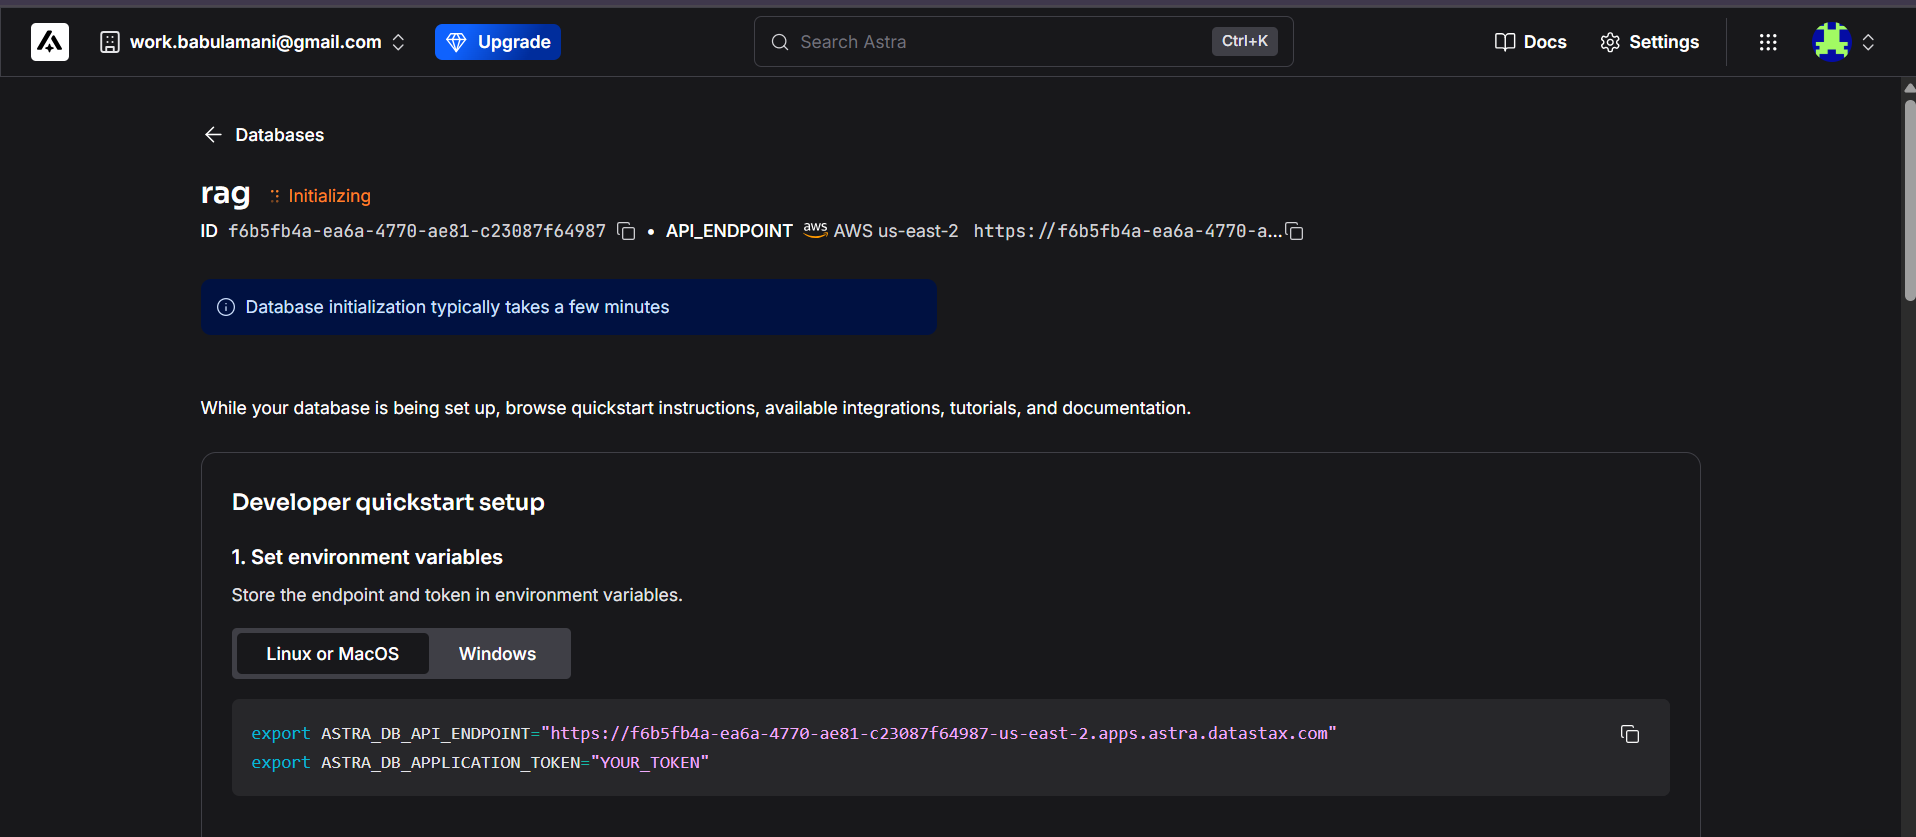


Once db is created
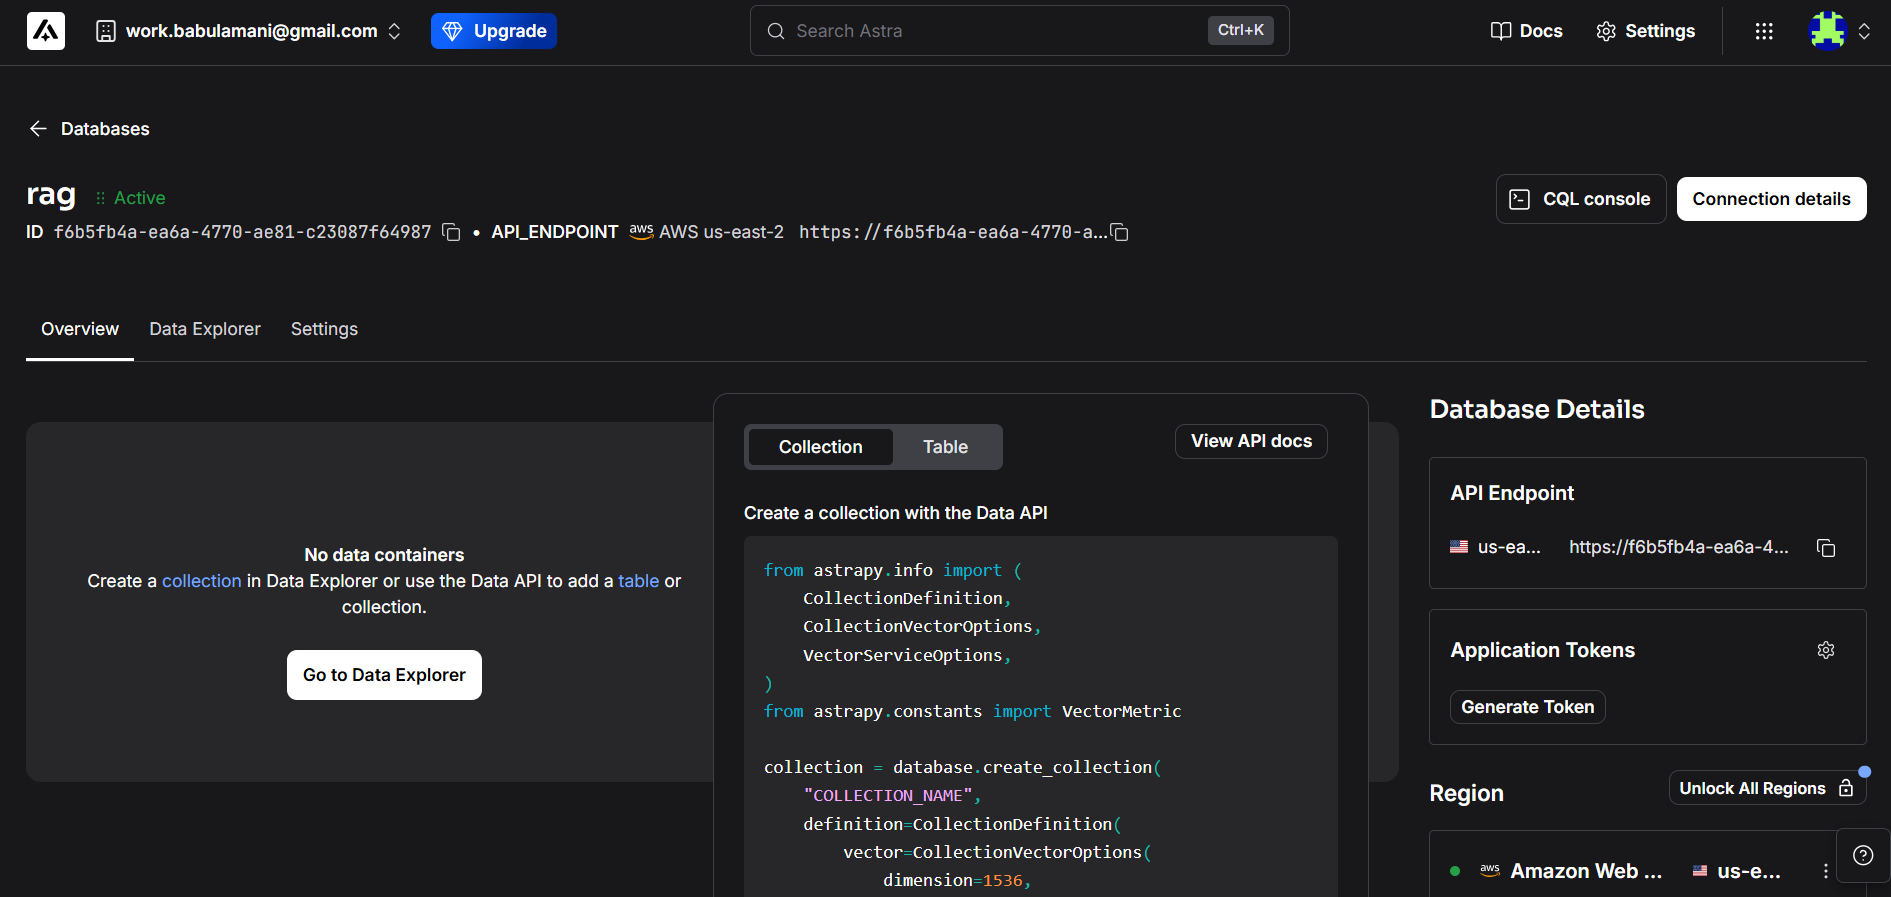

Generate token


In [ ]:
!pip install \
    "langchain>=0.3.23,<0.4" \
    "langchain-core>=0.3.52,<0.4" \
    "langchain-astradb>=0.6,<0.7"

!pip install langchain_openai
!pip install --upgrade astrapy

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

In [ ]:
# Config

ASTRA_DB_API_ENDPOINT = os.environ["ASTRA_DB_API_ENDPOINT"]
ASTRA_DB_APPLICATION_TOKEN = os.environ["ASTRA_DB_APPLICATION_TOKEN"]


In [ ]:
from langchain_openai import OpenAIEmbeddings

In [ ]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-small",
                              dimensions=1024,
                              api_key=os.environ['OPENAI_API_KEY'])

In [ ]:
embeddings

OpenAIEmbeddings(client=<openai.resources.embeddings.Embeddings object at 0x7c16b936b7a0>, async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x7c16b90ee690>, model='text-embedding-3-small', dimensions=1024, deployment='text-embedding-ada-002', openai_api_version=None, openai_api_base=None, openai_api_type=None, openai_proxy=None, embedding_ctx_length=8191, openai_api_key=SecretStr('**********'), openai_organization=None, allowed_special=None, disallowed_special=None, chunk_size=1000, max_retries=2, request_timeout=None, headers=None, tiktoken_enabled=True, tiktoken_model_name=None, show_progress_bar=False, model_kwargs={}, skip_empty=False, default_headers=None, default_query=None, retry_min_seconds=4, retry_max_seconds=20, http_client=None, http_async_client=None, check_embedding_ctx_length=True)

In [ ]:
from langchain_astradb import AstraDBVectorStore
vector_store = AstraDBVectorStore(
    embedding=embeddings,
    api_endpoint=ASTRA_DB_API_ENDPOINT,
    collection_name="astra_vector_langchain",
    token=ASTRA_DB_APPLICATION_TOKEN,
    namespace=None
)

In [ ]:
vector_store

In [ ]:
from langchain_core.documents import Document

document_1 = Document(
    page_content="I had chocolate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "tweet"},
)

document_2 = Document(
    page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
    metadata={"source": "news"},
)

document_3 = Document(
    page_content="Building an exciting new project with LangChain - come check it out!",
    metadata={"source": "tweet"},
)

document_4 = Document(
    page_content="Robbers broke into the city bank and stole $1 million in cash.",
    metadata={"source": "news"},
)

document_5 = Document(
    page_content="Wow! That was an amazing movie. I can't wait to see it again.",
    metadata={"source": "tweet"},
)

document_6 = Document(
    page_content="Is the new iPhone worth the price? Read this review to find out.",
    metadata={"source": "website"},
)

document_7 = Document(
    page_content="The top 10 soccer players in the world right now.",
    metadata={"source": "website"},
)

document_8 = Document(
    page_content="LangGraph is the best framework for building stateful, agentic applications!",
    metadata={"source": "tweet"},
)

document_9 = Document(
    page_content="The stock market is down 500 points today due to fears of a recession.",
    metadata={"source": "news"},
)

document_10 = Document(
    page_content="I have a bad feeling I am going to get deleted :(",
    metadata={"source": "tweet"},
)

documents = [
    document_1,
    document_2,
    document_3,
    document_4,
    document_5,
    document_6,
    document_7,
    document_8,
    document_9,
    document_10,
]

In [ ]:
documents

[Document(metadata={'source': 'tweet'}, page_content='I had chocolate chip pancakes and scrambled eggs for breakfast this morning.'),
 Document(metadata={'source': 'news'}, page_content='The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.'),
 Document(metadata={'source': 'tweet'}, page_content='Building an exciting new project with LangChain - come check it out!'),
 Document(metadata={'source': 'news'}, page_content='Robbers broke into the city bank and stole $1 million in cash.'),
 Document(metadata={'source': 'tweet'}, page_content="Wow! That was an amazing movie. I can't wait to see it again."),
 Document(metadata={'source': 'website'}, page_content='Is the new iPhone worth the price? Read this review to find out.'),
 Document(metadata={'source': 'website'}, page_content='The top 10 soccer players in the world right now.'),
 Document(metadata={'source': 'tweet'}, page_content='LangGraph is the best framework for building stateful, agentic application

In [ ]:
vector_store.add_documents(documents)

['0581a5c1a72f4a908d49405a567abad3',
 '70cdf9e10f4c4d348d05af73da55d147',
 'ebdb18ce38004663bdea3cea6886489d',
 'b397afb56e20400da1d5e8c920bd7a59',
 'ed48a0403ede428a81e2c438f3c4ae03',
 'a6b89fd0252540b5bccd30147923291f',
 '8508c96cdea4447ca0f815edeaf9cf70',
 'e56b4459de3f49249fa2dcbb412e0797',
 '622f8908a3b84e29a5eaac8a931bc993',
 '566fe1e9d6f24fc8918c7c9fbba5292e']

In [ ]:
# search from vector db

vector_store.similarity_search("what is the weather?")

[Document(id='70cdf9e10f4c4d348d05af73da55d147', metadata={'source': 'news'}, page_content='The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.'),
 Document(id='566fe1e9d6f24fc8918c7c9fbba5292e', metadata={'source': 'tweet'}, page_content='I have a bad feeling I am going to get deleted :('),
 Document(id='622f8908a3b84e29a5eaac8a931bc993', metadata={'source': 'news'}, page_content='The stock market is down 500 points today due to fears of a recession.'),
 Document(id='8508c96cdea4447ca0f815edeaf9cf70', metadata={'source': 'website'}, page_content='The top 10 soccer players in the world right now.')]

In [ ]:
results = vector_store.similarity_search(
    "Langchain provides abstractions to make working with LLMs easy",
    k=3,
    filter={"source":"tweet"}
)

for res in results:
  print(f"* '{res.page_content}', metadata={res.metadata}")

* 'LangGraph is the best framework for building stateful, agentic applications!', metadata={'source': 'tweet'}
* 'Building an exciting new project with LangChain - come check it out!', metadata={'source': 'tweet'}
* 'Wow! That was an amazing movie. I can't wait to see it again.', metadata={'source': 'tweet'}


In [ ]:
results = vector_store.similarity_search_with_score(
    "Langchain provides abstractions to make working with LLMs easy",
    k=3,
    filter={"source":"tweet"}
)

for res, score in results:
  print(f'* [SIM={score:.2f}] "{res.page_content}", metadata={res.metadata}')

* [SIM=0.71] "LangGraph is the best framework for building stateful, agentic applications!", metadata={'source': 'tweet'}
* [SIM=0.69] "Building an exciting new project with LangChain - come check it out!", metadata={'source': 'tweet'}
* [SIM=0.53] "Wow! That was an amazing movie. I can't wait to see it again.", metadata={'source': 'tweet'}


In [ ]:
## Retriever

retriever = vector_store.as_retriever(
    search_type="similarity_score_threshold",
    search_kwargs={"k":1,
                   "score_threshold":0.5}
)

retriever.invoke("Stealing from bank is a crime",
                 filter={"source":"news"})

[Document(id='b397afb56e20400da1d5e8c920bd7a59', metadata={'source': 'news'}, page_content='Robbers broke into the city bank and stole $1 million in cash.')]

In [ ]:
## Retriever

retriever = vector_store.as_retriever(
    search_type="mmr",
    search_kwargs={"k":1}
)

retriever.invoke("Stealing from bank is a crime",
                 filter={"source":"news"})

[Document(id='b397afb56e20400da1d5e8c920bd7a59', metadata={'source': 'news'}, page_content='Robbers broke into the city bank and stole $1 million in cash.')]